In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn

data = pd.read_csv("c2_weatherHistory.csv", index_col="Date", parse_dates=True)
data = data.sort_index()  # Make sure that the entries are sorted
data.head()

,Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km)
Date,,,,,,
2006-01-01 00:00:00,Partly Cloudy,0.577778,0.89,17.1143,140,9.9820
2006-01-01 01:00:00,Mostly Cloudy,1.161111,0.85,16.6152,139,9.9015
2006-01-01 02:00:00,Mostly Cloudy,1.666667,0.82,20.2538,140,9.9015
2006-01-01 03:00:00,Overcast,1.711111,0.82,14.4900,140,9.9015
2006-01-01 04:00:00,Mostly Cloudy,1.183333,0.86,13.9426,134,9.9015


In [2]:
data = data["Temperature (C)"]
data = data["2006-01-01":"2009-12-31"]

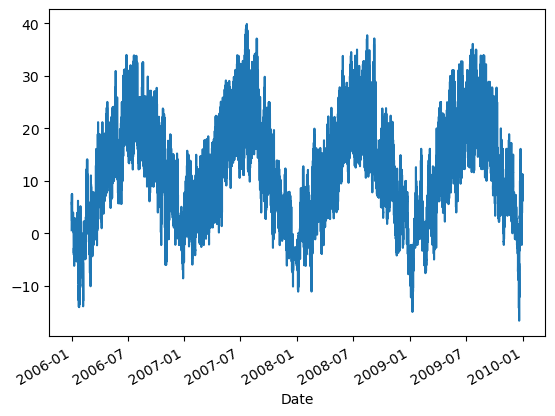

In [3]:
data.plot()
plt.show()

In [4]:
by_time = data.groupby(data.index.time).mean()
by_time

00:00:00     9.454293
01:00:00     9.030033
02:00:00     8.747593
03:00:00     8.289330
04:00:00     8.020971
05:00:00     7.816473
06:00:00     7.864769
07:00:00     8.799072
08:00:00    10.317918
09:00:00    12.016556
10:00:00    13.504415
11:00:00    14.663126
12:00:00    15.556297
13:00:00    16.123857
14:00:00    16.422534
15:00:00    16.469633
16:00:00    16.110430
17:00:00    15.488239
18:00:00    14.579949
19:00:00    13.474241
20:00:00    12.181025
21:00:00    11.069800
22:00:00    10.624610
23:00:00    10.060735
Name: Temperature (C), dtype: float64

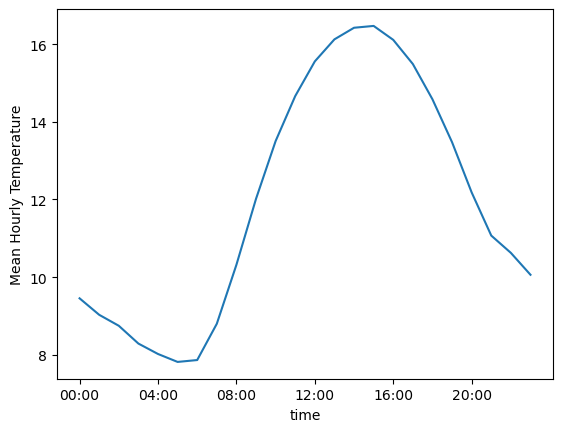

In [8]:
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks)
plt.ylabel("Mean Hourly Temperature")
plt.show()

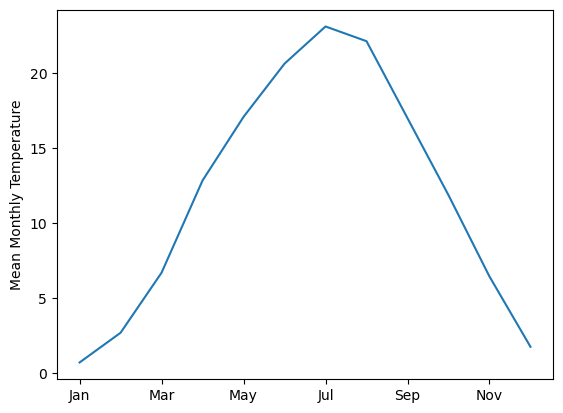

In [9]:
by_month = data.groupby(data.index.month).mean()
by_month.index = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]
monthly_ticks = 2 * np.arange(6)
plt.ylabel("Mean Monthly Temperature")
by_month.plot(xticks=monthly_ticks)
plt.show()

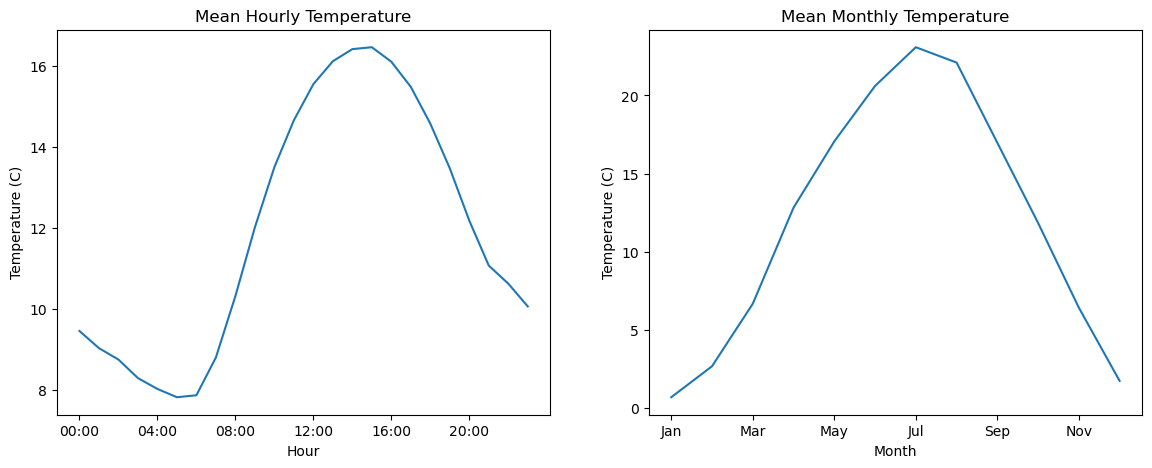

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.plot(ax=ax[0], title='Mean Hourly Temperature', xticks=hourly_ticks)
by_month.plot(ax=ax[1], title='Mean Monthly Temperature', xticks=monthly_ticks)
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Temperature (C)')
ax[0].set_ylabel('Temperature (C)')
ax[0].set_xlabel('Hour')
plt.show()
